In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
train_dir = 'cifar10_alexnet_model/'

In [7]:
training_data = np.genfromtxt (train_dir+'training_data.csv', delimiter=",")
validation_data = np.genfromtxt (train_dir+'validation_data.csv', delimiter=",")

In [8]:
validation_data = np.array(map(lambda x: [((x[0]-x[0]%10)/float(50000/float(batch_size))),x[1],x[2]],validation_data))
training_data = np.array(map(lambda x: [x[0]/(50000/float(batch_size)),x[1],x[2]], training_data))

In [9]:
training_df = pd.DataFrame(training_data, index=training_data.transpose()[0],columns=['step','error','accuracy'])
validation_df = pd.DataFrame(validation_data, index=validation_data.transpose()[0],columns=['step','error','accuracy'])

In [10]:
validation_df

,step,error,accuracy
0.0000,0.0000,17.360848,0.097812
0.1536,0.1536,15.665549,0.340469
0.5120,0.5120,13.527618,0.378125
0.6656,0.6656,12.470553,0.434063
0.8448,0.8448,11.518367,0.469062
1.1776,1.1776,9.932622,0.531875
1.3568,1.3568,9.289051,0.519531
1.6896,1.6896,7.978031,0.578125
1.8688,1.8688,7.523765,0.586719
2.0224,2.0224,7.054106,0.572812


In [11]:
plot_df = pd.merge(training_df,validation_df,how='inner',on=['step','step'])

In [12]:
plot_data = plot_df.as_matrix().transpose()

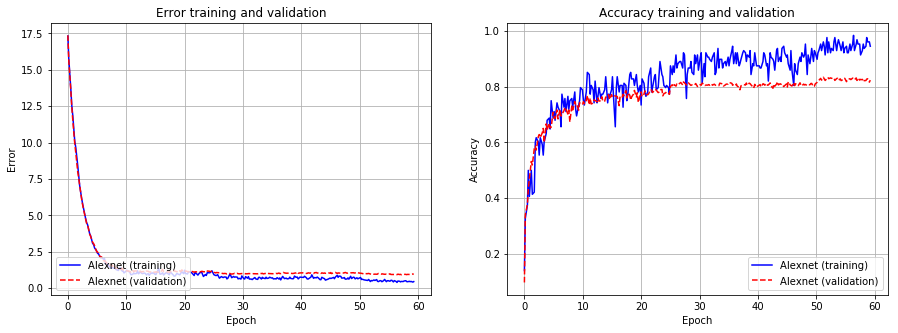

In [13]:
ax = plt.figure()
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(plot_data[0], plot_data[1], 'b-', label='Alexnet (training)')
plt.plot(plot_data[0], plot_data[3], 'r--', label='Alexnet (validation)')
'''plt.plot(err_train_tanh.keys(), err_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(err_valid_tanh.keys(), err_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(err_train_relu.keys(), err_train_relu.values(), 'g-', label='relu (training)')
plt.plot(err_valid_relu.keys(), err_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Error training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='lower left', fontsize='medium')

plt.subplot(122)
plt.plot(plot_data[0], plot_data[2], 'b-', label='Alexnet (training)')
plt.plot(plot_data[0], plot_data[4], 'r--', label='Alexnet (validation)')
'''plt.plot(acc_train_tanh.keys(), acc_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(acc_valid_tanh.keys(), acc_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(acc_train_relu.keys(), acc_train_relu.values(), 'g-', label='relu (training)')
plt.plot(acc_valid_relu.keys(), acc_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Accuracy training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', fontsize='medium')

plt.savefig('images/alexnet.pdf', bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
train_dir = 'cifar100_alexnet_model/'

In [ ]:
training_data = np.genfromtxt (train_dir+'training_data.csv', delimiter=",")
validation_data = np.genfromtxt (train_dir+'validation_data.csv', delimiter=",")

In [ ]:
validation_data = np.array(map(lambda x: [((x[0]-x[0]%10)/float(50000/float(batch_size))),x[1],x[2]],validation_data))
training_data = np.array(map(lambda x: [x[0]/(50000/float(batch_size)),x[1],x[2]], training_data))

In [ ]:
training_df = pd.DataFrame(training_data, index=training_data.transpose()[0],columns=['step','error','accuracy'])
validation_df = pd.DataFrame(validation_data, index=validation_data.transpose()[0],columns=['step','error','accuracy'])

In [ ]:
plot_df = pd.merge(training_df,validation_df,how='inner',on=['step','step'])

In [ ]:
plot_data = plot_df.as_matrix().transpose()

In [ ]:
ax = plt.figure()
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(plot_data[0], plot_data[1], 'r-', label='Alexnet (training)')
plt.plot(plot_data[0], plot_data[3], 'r--', label='Alexnet (validation)')
'''plt.plot(err_train_tanh.keys(), err_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(err_valid_tanh.keys(), err_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(err_train_relu.keys(), err_train_relu.values(), 'g-', label='relu (training)')
plt.plot(err_valid_relu.keys(), err_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Error training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='lower left', fontsize='medium')

plt.subplot(122)
plt.plot(plot_data[0], plot_data[2], 'r-', label='Alexnet (training)')
plt.plot(plot_data[0], plot_data[4], 'r--', label='Alexnet (validation)')
'''plt.plot(acc_train_tanh.keys(), acc_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(acc_valid_tanh.keys(), acc_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(acc_train_relu.keys(), acc_train_relu.values(), 'g-', label='relu (training)')
plt.plot(acc_valid_relu.keys(), acc_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Accuracy training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', fontsize='medium')

#plt.savefig('activation_functions.pdf', bbox_inches='tight')
plt.show()